<a href="https://colab.research.google.com/github/BrahmaTeja7/CA_One_ComputerSecurity_Assignment/blob/main/Fake_News_Prediction_using_Count_Vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries for finding the accuracy of the selected Machine learning models in predicting the fake news.**

In [ ]:
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score, precision_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from scipy.stats import uniform, randint,expon

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Loading the Dataset using Pandas Library**

In [ ]:
dataset = pd.read_csv('/content/Fake&True_News.csv')

# **Preliminary Checks**

In [ ]:
dataset.shape

(44867, 5)

### **Shuffling the dataset row set records**

In [ ]:
shuffled_dataset = dataset.sample(frac=1.0)
print(shuffled_dataset)

                                                   title  \
10715  NEW NORMAL? MASSIVE MUSIC FESTIVAL In Angela M...   
17469  “ENTITLED” DEM REP. SHEILA JACKSON LEE Has Bee...   
29519  Trump health nominee says he does not back Med...   
20997  LILY WHITE MERYL STREEP Explains Why They Don’...   
19700  CROOKED HARRY REID Threatens FBI Director Jame...   
...                                                  ...   
25452  Gorka, a Trump adviser and Bannon ally, is out...   
28968  Ethics review sought after Trump adviser touts...   
36330  Russian ex-minister Ulyukayev: I am victim of ...   
7153    Maine GOP Governor Holds State Senate Hostage...   
39164  Belgian prosecutor says will study Puigdemont ...   

                                                    text       subject  \
10715  In 2016, 2.14 million people moved to Germany ...      politics   
17469  Jean-Marie Simon, a passenger on a United Airl...     left-news   
29519  (Reuters) - President Donald Trump’s nominee t... 

### **Creating a new column "label" to convert the values of True or False to 0 & 1.**

In [ ]:
shuffled_dataset['label'] = np.where(shuffled_dataset['marker'] == True, 0, 1)
print(shuffled_dataset)

                                                   title  \
10715  NEW NORMAL? MASSIVE MUSIC FESTIVAL In Angela M...   
17469  “ENTITLED” DEM REP. SHEILA JACKSON LEE Has Bee...   
29519  Trump health nominee says he does not back Med...   
20997  LILY WHITE MERYL STREEP Explains Why They Don’...   
19700  CROOKED HARRY REID Threatens FBI Director Jame...   
...                                                  ...   
25452  Gorka, a Trump adviser and Bannon ally, is out...   
28968  Ethics review sought after Trump adviser touts...   
36330  Russian ex-minister Ulyukayev: I am victim of ...   
7153    Maine GOP Governor Holds State Senate Hostage...   
39164  Belgian prosecutor says will study Puigdemont ...   

                                                    text       subject  \
10715  In 2016, 2.14 million people moved to Germany ...      politics   
17469  Jean-Marie Simon, a passenger on a United Airl...     left-news   
29519  (Reuters) - President Donald Trump’s nominee t... 

**Converting the text to lowercase**

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['text'].str.lower()
print(shuffled_dataset)

                                                   title  \
10715  NEW NORMAL? MASSIVE MUSIC FESTIVAL In Angela M...   
17469  “ENTITLED” DEM REP. SHEILA JACKSON LEE Has Bee...   
29519  Trump health nominee says he does not back Med...   
20997  LILY WHITE MERYL STREEP Explains Why They Don’...   
19700  CROOKED HARRY REID Threatens FBI Director Jame...   
...                                                  ...   
25452  Gorka, a Trump adviser and Bannon ally, is out...   
28968  Ethics review sought after Trump adviser touts...   
36330  Russian ex-minister Ulyukayev: I am victim of ...   
7153    Maine GOP Governor Holds State Senate Hostage...   
39164  Belgian prosecutor says will study Puigdemont ...   

                                                    text       subject  \
10715  In 2016, 2.14 million people moved to Germany ...      politics   
17469  Jean-Marie Simon, a passenger on a United Airl...     left-news   
29519  (Reuters) - President Donald Trump’s nominee t... 

**Removing the Punctuations in the text**

In [ ]:
def removing_punctuations(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: removing_punctuations(x))
print(shuffled_dataset)

                                                   title  \
10715  NEW NORMAL? MASSIVE MUSIC FESTIVAL In Angela M...   
17469  “ENTITLED” DEM REP. SHEILA JACKSON LEE Has Bee...   
29519  Trump health nominee says he does not back Med...   
20997  LILY WHITE MERYL STREEP Explains Why They Don’...   
19700  CROOKED HARRY REID Threatens FBI Director Jame...   
...                                                  ...   
25452  Gorka, a Trump adviser and Bannon ally, is out...   
28968  Ethics review sought after Trump adviser touts...   
36330  Russian ex-minister Ulyukayev: I am victim of ...   
7153    Maine GOP Governor Holds State Senate Hostage...   
39164  Belgian prosecutor says will study Puigdemont ...   

                                                    text       subject  \
10715  In 2016, 2.14 million people moved to Germany ...      politics   
17469  Jean-Marie Simon, a passenger on a United Airl...     left-news   
29519  (Reuters) - President Donald Trump’s nominee t... 

**Removing the stopwords in text column**

In [ ]:
Stopword = set(stopwords.words('english'))
def removing_stopwords(text):
  return " ".join([word for word in text.split() if word not in Stopword])

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: removing_stopwords(x))
print(shuffled_dataset)

                                                   title  \
10715  NEW NORMAL? MASSIVE MUSIC FESTIVAL In Angela M...   
17469  “ENTITLED” DEM REP. SHEILA JACKSON LEE Has Bee...   
29519  Trump health nominee says he does not back Med...   
20997  LILY WHITE MERYL STREEP Explains Why They Don’...   
19700  CROOKED HARRY REID Threatens FBI Director Jame...   
...                                                  ...   
25452  Gorka, a Trump adviser and Bannon ally, is out...   
28968  Ethics review sought after Trump adviser touts...   
36330  Russian ex-minister Ulyukayev: I am victim of ...   
7153    Maine GOP Governor Holds State Senate Hostage...   
39164  Belgian prosecutor says will study Puigdemont ...   

                                                    text       subject  \
10715  In 2016, 2.14 million people moved to Germany ...      politics   
17469  Jean-Marie Simon, a passenger on a United Airl...     left-news   
29519  (Reuters) - President Donald Trump’s nominee t... 

**Removing the special Characters, Html tags, Url in text column**

In [ ]:
def remove_chars_url_htmlTags(text):
  text = re.sub('[^a-zA-Z0-9]', ' ',text)
  text = re.sub('\s+', ' ',text)
  text = re.sub(r'https?://\S+|www\.\S+','',text)
  text = re.sub(r'<.*?>','',text)
  return text

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: remove_chars_url_htmlTags(x))
shuffled_dataset.head()

,title,text,subject,date,marker,label,processing_text
41468,Israel strikes Hamas post after Gaza rocket fire,JERUSALEM (Reuters) - The Israeli military sai...,worldnews,08-Oct-17,True,0,jerusalem reuters israeli military said sunday...
1467,Chris Wallace SCOLDS Fox News Colleagues For ...,The hosts of Fox & Friends just got their asse...,News,14-May-17,False,1,hosts fox friends got asses handed one colleag...
19719,DO WOMAN WANT TO ELECT A BULLY Whose Campaign ...,"As a mother of three young girls, Hillary is t...",left-news,26-Oct-16,False,1,mother three young girls hillary last person w...
6635,This DA Just Called B.S. On Anti-Trans Republ...,As the GOP s fight to control which bathrooms ...,News,29-Apr-16,False,1,gop fight control bathrooms transgender people...
23841,U.S. states gird for fight as Trump targets co...,WASHINGTON (Reuters) - Pennsylvania’s Attorney...,politicsNews,01-Dec-17,True,0,washington reuters pennsylvania s attorney gen...


**Initializing Porter Stemmer function and applying stemming to reduce the text to their root word**

In [ ]:
port_stemming = PorterStemmer()

In [ ]:
def stemming(text):
  return " ".join([port_stemming.stem(word) for word in text.split()])

In [ ]:
shuffled_dataset['stemmed_text'] = shuffled_dataset['processing_text'].apply(lambda x: stemming(x))
shuffled_dataset.head()

,title,text,subject,date,marker,label,processing_text,stemmed_text
41468,Israel strikes Hamas post after Gaza rocket fire,JERUSALEM (Reuters) - The Israeli military sai...,worldnews,08-Oct-17,True,0,jerusalem reuters israeli military said sunday...,jerusalem reuter isra militari said sunday des...
1467,Chris Wallace SCOLDS Fox News Colleagues For ...,The hosts of Fox & Friends just got their asse...,News,14-May-17,False,1,hosts fox friends got asses handed one colleag...,host fox friend got ass hand one colleagu prot...
19719,DO WOMAN WANT TO ELECT A BULLY Whose Campaign ...,"As a mother of three young girls, Hillary is t...",left-news,26-Oct-16,False,1,mother three young girls hillary last person w...,mother three young girl hillari last person wo...
6635,This DA Just Called B.S. On Anti-Trans Republ...,As the GOP s fight to control which bathrooms ...,News,29-Apr-16,False,1,gop fight control bathrooms transgender people...,gop fight control bathroom transgend peopl use...
23841,U.S. states gird for fight as Trump targets co...,WASHINGTON (Reuters) - Pennsylvania’s Attorney...,politicsNews,01-Dec-17,True,0,washington reuters pennsylvania s attorney gen...,washington reuter pennsylvania s attorney gene...


**Tokenizing the words in the text column**

In [ ]:
def token(text):
  return word_tokenize(text)

In [ ]:
shuffled_dataset['stemmed_text'] = shuffled_dataset['stemmed_text'].apply(lambda x: token(x))
print(shuffled_dataset)

                                                   title  \
41468   Israel strikes Hamas post after Gaza rocket fire   
1467    Chris Wallace SCOLDS Fox News Colleagues For ...   
19719  DO WOMAN WANT TO ELECT A BULLY Whose Campaign ...   
6635    This DA Just Called B.S. On Anti-Trans Republ...   
23841  U.S. states gird for fight as Trump targets co...   
...                                                  ...   
21930  Digital Tabloids, Narco-memes & The League of ...   
35619  Supporters of Hungarian Jobbik opposition part...   
22392  Hillary’s Secret Weapon: Evan McMullin is CIA-...   
10645  PRESIDENT TRUMP CRASHES WEDDING: Shocks Weddin...   
27233  New U.S. trade envoy says to meet lawmakers on...   

                                                    text       subject  \
41468  JERUSALEM (Reuters) - The Israeli military sai...     worldnews   
1467   The hosts of Fox & Friends just got their asse...          News   
19719  As a mother of three young girls, Hillary is t... 

**Creating Train and Test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_dataset.text, shuffled_dataset.label, test_size=0.25)

In [ ]:
print('X_train:', X_train.shape,
      'X_test:', X_test.shape,
      'y_train:', y_train.shape,
      'y_test:', y_test.shape)


X_train: (33650,) X_test: (11217,) y_train: (33650,) y_test: (11217,)


**Applying CountVectorizer**

In [ ]:
bag_of_words = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [ ]:
X_train_bow = bag_of_words.fit_transform(X_train.values)
#y_train = shuffled_dataset.label

In [ ]:
X_train_bow

<33650x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 7885395 stored elements in Compressed Sparse Row format>

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

shuffled_dataset['stemmed_text'] = shuffled_dataset['stemmed_text'].apply(lambda x: ' '.join(x))


tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(shuffled_dataset['stemmed_text'])

feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_values = tfidf_matrix.sum(axis=0).A1

# Create a dictionary with word frequencies
word_frequencies = dict(zip(feature_names, tfidf_values))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Sample text
#text = "This is a sample text for creating a word cloud. Word clouds are a visual representation of word frequencies."

# Step 1: Create a Bag-of-Words Model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(shuffled_dataset['text'])

# Step 2: Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0])))

# Step 3: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

# shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: ' '.join(x))


# bag_of_words = CountVectorizer(max_features=5000,ngram_range=(1,3))
# bow_matrix = bag_of_words.fit_transform(shuffled_dataset['processing_text'])

# feature_names = bow_matrix.get_feature_names()

# bow_values = bow_matrix.sum(axis=0).A1

# # Create a dictionary with word frequencies
# word_frequencies = dict(zip(feature_names, bow_values))

# # Create a WordCloud object
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# # Display the WordCloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# from sklearn.feature_extraction.text import CountVectorizer

# # Assuming 'shuffled_dataset' is a DataFrame with a 'stemmed_text' column
# if not shuffled_dataset['stemmed_text'].empty:
#     bag_of_words = CountVectorizer(max_features=5000, ngram_range=(1, 3))
#     bow_matrix = bag_of_words.fit_transform(shuffled_dataset['stemmed_text'])

#     # Get feature names from the CountVectorizer
#     feature_names = bag_of_words.get_feature_names_out()

#     # Get word frequencies from the bag-of-words matrix
#     bow_values = bow_matrix.sum(axis=0).A1

#     # Create a dictionary with word frequencies
#     word_frequencies = dict(zip(feature_names, bow_values))

#     # Create a WordCloud object
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

#     # Display the WordCloud
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.show()
# else:
#     print("The 'stemmed_text' column is empty.")

# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data


# Step 1: Create a Count Vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(shuffled_dataset.text)

# Step 2: Get feature names and their counts
feature_names = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)

# Step 3: Create a dictionary with words and their counts
word_count_dict = dict(zip(feature_names, word_counts))

# Step 4: Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Step 5: Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



# **Initializing the selected Machine learning models**

In [ ]:
svm_model = SVC()
nb_model = MultinomialNB()
xgb_model = xgb.XGBClassifier()

# **Defining Hyperparameters for selected Machine learning algorithms**

In [ ]:
svm_param_distributions = {'C': uniform(0.5, 1), 'kernel': ['linear', 'rbf', 'sigmoid']}
nb_param_distributions = {'alpha': uniform(0.5, 10)}
xgb_param_distributions = {'n_estimators': randint(50, 100), 'max_depth': randint(3, 8)}

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# **Multinomial Naive Bayes**

In [ ]:
random_search = RandomizedSearchCV(estimator=nb_model, param_distributions=nb_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

In [ ]:
random_search.fit(X_train_bow, y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=MultinomialNB(), n_iter=5,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d54f33e1f00>},
                   random_state=1, scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Best Parameters:  {'alpha': 0.5011437481734489}
Best Accuracy:  0.9610104011887073


In [ ]:
X_test_bow = bag_of_words.transform(X_test)

In [ ]:
y_pred = random_search.predict(X_test_bow)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5304
           1       0.97      0.95      0.96      5913

    accuracy                           0.96     11217
   macro avg       0.96      0.96      0.96     11217
weighted avg       0.96      0.96      0.96     11217



Confusion Matrix:
[[5120  184]
 [ 284 5629]]


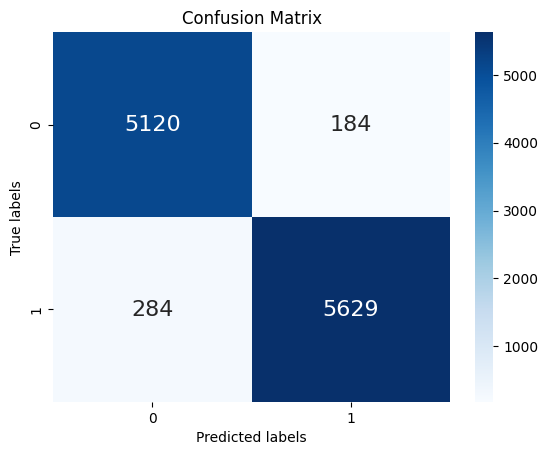

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

#y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred_nb = random_search.predict_proba(X_test_bow)#[:, 1]

# Assuming y_test is your true labels
fpr, tpr, threshold = roc_curve(y_test, y_pred_nb[:, 1])
roc_auc = auc(fpr, tpr)

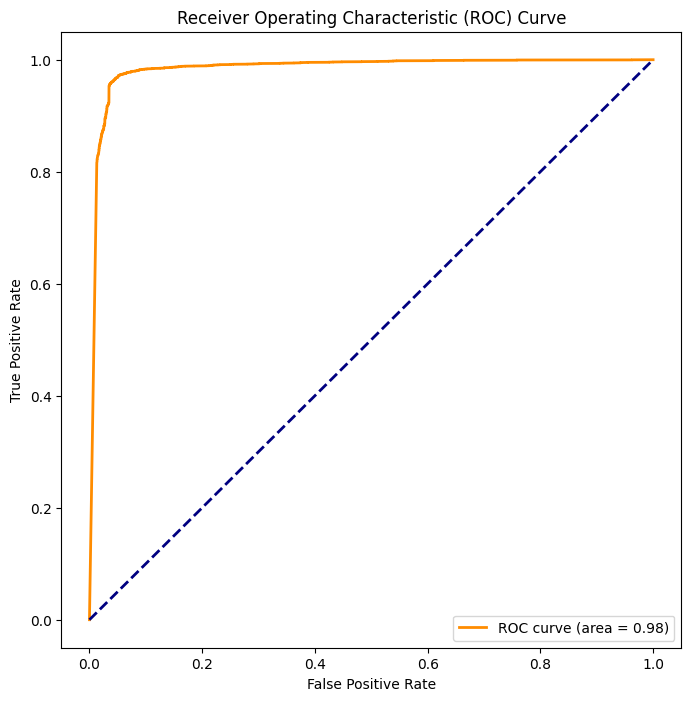

In [ ]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **XGboost**

In [ ]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

In [ ]:
random_search.fit(X_train_bow, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importan...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d54f33e2bc0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d54f33e24d0>},
                   random_state=1, scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Best Parameters:  {'max_depth': 6, 'n_estimators': 62}
Best Accuracy:  0.9980980683506686


In [ ]:
X_test_bow = bag_of_words.transform(X_test)

In [ ]:
y_pred = random_search.predict(X_test_bow)

accuracyscore = metrics.accuracy_score(y_test, y_pred)
print(accuracyscore)
print(classification_report(y_test, y_pred))

0.9974146384951413
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5304
           1       1.00      1.00      1.00      5913

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217



In [ ]:
print(accuracyscore)

0.9974146384951413


Confusion Matrix:
[[5288   16]
 [  13 5900]]


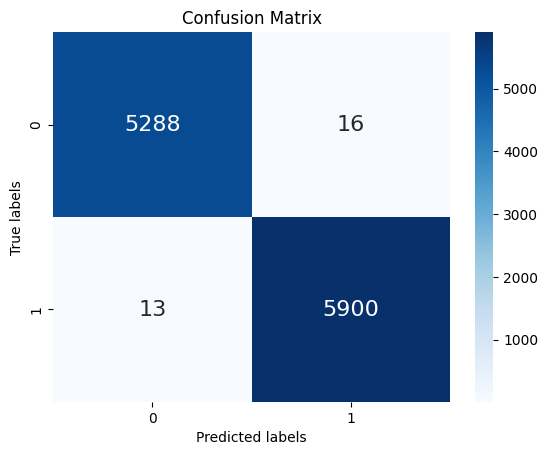

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

#y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = random_search.predict_proba(X_test_bow)[:, 1]

# Assuming y_test is your true labels
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

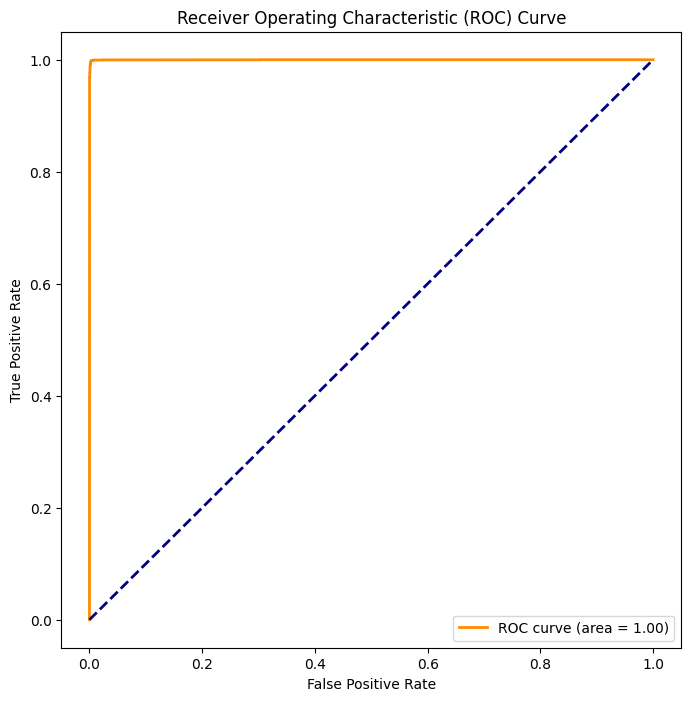

In [ ]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Support Vector Machine**

In [ ]:
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

In [ ]:
random_search.fit(X_train_bow, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=SVC(), n_iter=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7de27915ff70>,
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   random_state=1, scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Best Parameters:  {'C': 0.917022004702574, 'kernel': 'linear'}
Best Accuracy:  0.9954531946508173


In [ ]:
X_test_bow = bag_of_words.transform(X_test)

In [ ]:
y_pred = random_search.predict(X_test_bow)

accuracyscore = metrics.accuracy_score(y_test, y_pred)
print(accuracyscore)
print(classification_report(y_test, y_pred))

0.9965231345279486
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5278
           1       1.00      1.00      1.00      5939

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217



Confusion Matrix:
[[5257   21]
 [  18 5921]]


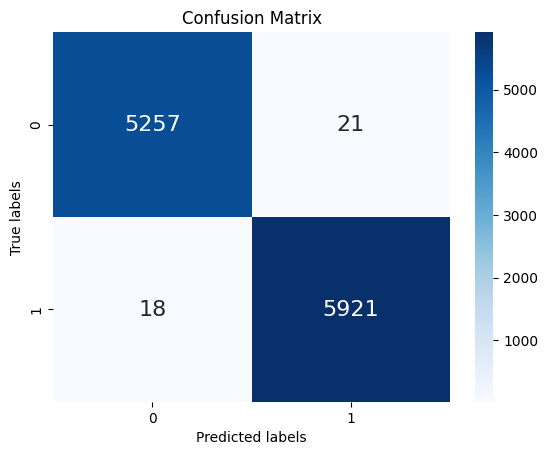

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

#y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred_svm = random_search.decision_function(X_test_bow)#[:, 1]

# Assuming y_test is your true labels
fpr, tpr, threshold = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)

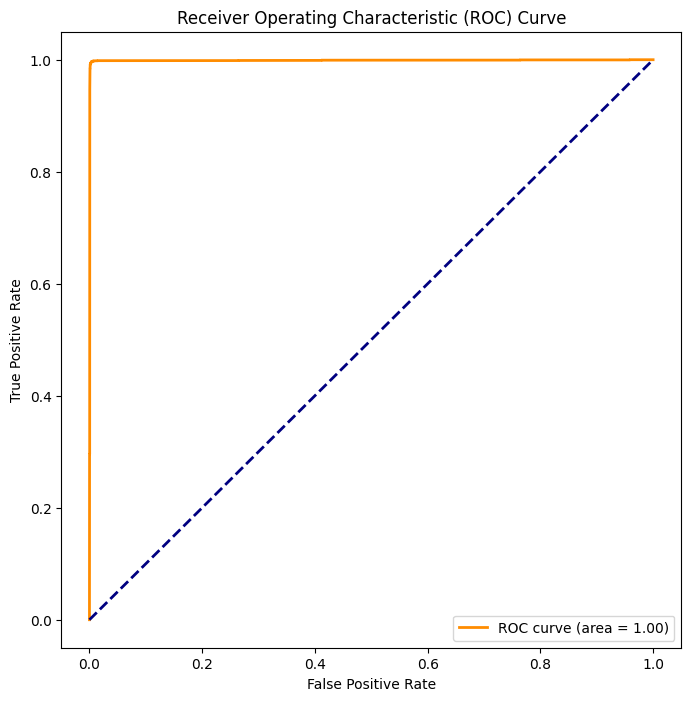

In [ ]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()